In [1]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
import dash

In [25]:
clubstats = pd.read_csv('clubstats.csv')
tables = pd.read_csv('tables.csv')

### Preprocessing

In [26]:
# Change to proper data types
clubstats['cross_accuracy'] = clubstats['cross_accuracy'].map(lambda x: x.rstrip('%')).astype('int')
clubstats['pass_accuracy'] = clubstats['pass_accuracy'].map(lambda x: x.rstrip('%')).astype('int')
clubstats['shooting_accuracy'] = clubstats['shooting_accuracy'].map(lambda x: x.rstrip('%')).astype('int')
clubstats['tackle_success'] = clubstats['tackle_success'].map(lambda x: x.rstrip('%')).astype('int')
clubstats['aerial_battles'] = clubstats['aerial_battles'].str.replace(',','').astype('int')
clubstats['clearance'] = clubstats['clearance'].str.replace(',','').astype('int')
clubstats['cross'] = clubstats['cross'].str.replace(',','').astype('int')

# In 'clubstats' AFC Bournemouth is named as it is, but in 'tables' it is named as 'Bournemouth'.
# So in order to join the two data frames, the club_name for AFC Bournmouth has to be changed.
clubstats['club_name'][53] = 'Bournemouth'
clubstats['club_name'][54] = 'Bournemouth'
clubstats['club_name'][55] = 'Bournemouth'
clubstats['club_name'][56] = 'Bournemouth'
clubstats['club_name'][57] = 'Bournemouth'

c:\users\hyunil yoo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\hyunil yoo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\hyunil yoo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [27]:
season_info = clubstats[clubstats['club_name'] == "Arsenal"]['season']
season_info

0     2019/20
1     2018/19
2     2017/18
3     2016/17
4     2015/16
5     2014/15
6     2013/14
7     2012/13
8     2011/12
9     2010/11
10    2009/10
11    2008/09
12    2007/08
13    2006/07
14    2005/06
15    2004/05
16    2003/04
17    2002/03
18    2001/02
19    2000/01
20    1999/00
21    1998/99
22    1997/98
23    1996/97
24    1995/96
25    1994/95
26    1993/94
27    1992/93
Name: season, dtype: object

In [28]:
clubstats[clubstats['club_name'] == "Arsenal"].loc[:,'season']

0     2019/20
1     2018/19
2     2017/18
3     2016/17
4     2015/16
5     2014/15
6     2013/14
7     2012/13
8     2011/12
9     2010/11
10    2009/10
11    2008/09
12    2007/08
13    2006/07
14    2005/06
15    2004/05
16    2003/04
17    2002/03
18    2001/02
19    2000/01
20    1999/00
21    1998/99
22    1997/98
23    1996/97
24    1995/96
25    1994/95
26    1993/94
27    1992/93
Name: season, dtype: object

In [29]:
season_info = clubstats[clubstats['club_name'] == "Arsenal"]['season']
seasons = []

for i in range(len(season_info)):
    if i < 25:
        seasons.append([season_info[i],] * 20)
    else:
        seasons.append([season_info[i],] * 22)

seasons_flat = [season for sub_season in seasons for season in sub_season]
tables['season'] = seasons_flat

# Join two data frames
data = pd.merge(tables, clubstats, on=['club_name', 'season'])

# To get total number of games
data['total_games'] = data['won'] + data['drawn'] + data['lost']
# Add top4 indicator 
data['is_top4'] = data['position'].apply(lambda x: 1 if (x <= 4) else 0)

In [30]:
data['season'] = pd.to_datetime(data['season'],format='%Y/%y')

In [31]:
for i in range(len(data['season'])):
    data['season'].iloc[i] = data['season'].iloc[i].year

In [58]:
clubstats

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,season,shooting_accuracy,shot_on_target,tackle_success
0,1853,38,519,Arsenal,548,22,1.29,1.43,258,84,507.11,2019/20,35,109,58
1,2489,72,762,Arsenal,605,21,1.34,1.92,412,83,547.50,2018/19,36,170,60
2,2660,81,829,Arsenal,572,21,1.34,1.95,427,84,619.05,2017/18,39,234,68
3,2762,55,838,Arsenal,697,22,1.16,2.03,536,84,563.00,2016/17,36,201,70
4,2785,88,849,Arsenal,754,25,0.95,1.71,734,84,559.18,2015/16,37,211,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,0,0,Nottingham Forest,0,0,1.48,0.98,0,0,0.00,1992/93,0,0,0
562,0,0,0,Barnsley,0,0,2.16,0.97,0,0,0.00,1997/98,0,0,0
563,0,0,0,Oldham Athletic,0,0,1.62,1.00,0,0,0.00,1993/94,0,0,0
564,0,0,0,Oldham Athletic,0,0,1.76,1.50,0,0,0.00,1992/93,0,0,0


In [8]:
top4 = data[data['is_top4'] == 1]
below4  = data[data['is_top4'] == 0]

goal_top4 = top4['goal'].mean()
goal_below4 = below4['goal'].mean()

In [38]:
df = data[(data['season'] > str(2011)) & (data['season'] < str(2019))]

In [57]:
type(data['season'].iloc[9])

int

In [53]:
data[(data['season'] > 2011) & (data['season'] < 2015)]

,club_name,drawn,goal,goal_against,lost,points,position,won,season,aerial_battles,...,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success,total_games,is_top4
120,Manchester City,5,102,37,6,86,1,27,2014,2562,...,0.97,2.68,496,86,546.34,35,238,77,38,1
121,Liverpool,6,101,50,6,84,2,26,2014,2858,...,1.32,2.66,465,84,515.76,40,258,76,38,1
122,Chelsea,7,71,27,6,82,3,25,2014,3055,...,0.71,1.87,380,83,480.68,33,229,77,38,1
123,Arsenal,7,68,41,7,79,4,24,2014,2777,...,1.08,1.79,541,86,567.39,41,213,74,38,1
124,Everton,9,61,39,8,72,5,21,2014,2733,...,1.03,1.61,463,84,481.61,35,196,77,38,0
125,Tottenham Hotspur,6,55,51,11,69,6,21,2014,2671,...,1.34,1.45,560,82,471.92,33,192,79,38,0
126,Manchester United,7,64,43,12,64,7,19,2014,2597,...,1.13,1.68,595,84,497.21,35,183,75,38,0
127,Southampton,11,54,46,12,56,8,15,2014,2815,...,1.21,1.42,528,81,515.18,34,179,79,38,0
128,Stoke City,11,45,52,14,50,9,13,2014,3289,...,1.37,1.18,474,78,403.26,32,137,75,38,0
129,Newcastle United,4,43,59,19,49,10,15,2014,3008,...,1.55,1.13,601,80,423.34,31,182,74,38,0


In [49]:
f = np.datetime64(2011, 'Y')
l = np.datetime64(2013, 'Y')

In [51]:
f > l

False

In [44]:
year1 = None

In [45]:
for i in range(2011,2012):
    year1 = i

In [47]:
type(year1)

int

In [48]:
type(2011)

int

In [20]:
fig = go.Figure()

In [24]:
tables.columns

Index(['club_name', 'drawn', 'goal', 'goal_against', 'lost', 'points',
       'position', 'won', 'season'],
      dtype='object')

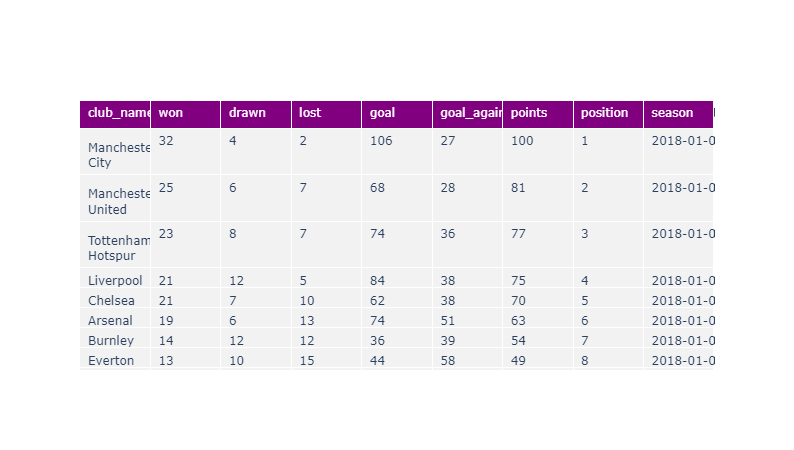

In [36]:
fig.add_trace(go.Table(header=dict(values=['club_name', 'won', 'drawn', 'lost', 'goal',
                                           'goal_against', 'points', 'position', 'season'],
                    fill_color='purple', font_color='white',
                    align='left'),
        cells=dict(values=[df.club_name, df.won, df.drawn, df.lost, df.goal,
                          df.goal_against, df.points, df.position, df.season],
                  fill_color= 'rgb(242,242,242)',
                  align='left'))
             )

In [14]:
df.columns

Index(['club_name', 'drawn', 'goal', 'goal_against', 'lost', 'points',
       'position', 'won', 'season', 'aerial_battles', 'big_chance_created',
       'clearance', 'cross', 'cross_accuracy', 'goal_conceded_per_match',
       'goal_per_match', 'interceptions', 'pass_accuracy', 'pass_per_game',
       'shooting_accuracy', 'shot_on_target', 'tackle_success', 'total_games',
       'is_top4'],
      dtype='object')

----


In [76]:
years = pd.DatetimeIndex(data['season'].unique()).year

avg_goals_top4 = []
for year in years:
    avg_goals_top4.append(top4[top4['season'] == str(year)].loc[:, 'goal'].mean())
    
avg_goals_below4 = []
for year in years:
    avg_goals_below4.append(below4[below4['season'] == str(year)].loc[:, 'goal'].mean())

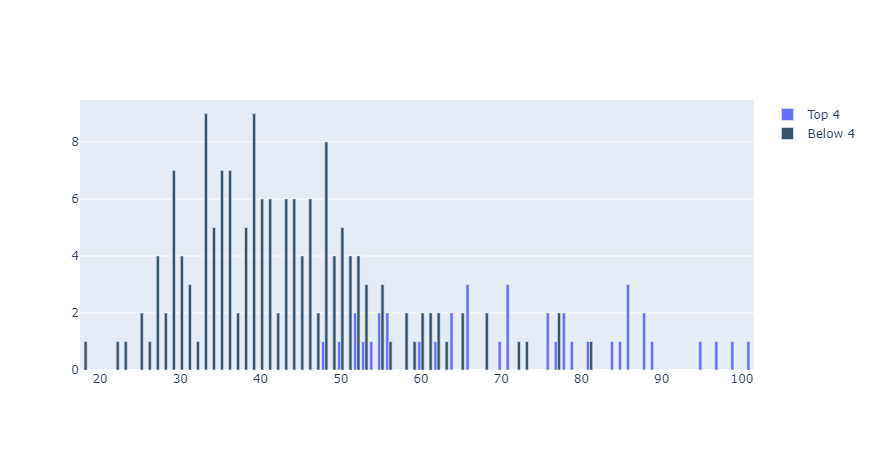

In [162]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = top4['big_chance_created'].value_counts().sort_index().drop(0).index,
    y = top4['big_chance_created'].value_counts().sort_index().drop(0),
    name = 'Top 4'
))
fig.add_trace(go.Bar(
    x = below4['big_chance_created'].value_counts().sort_index().drop(0).index,
    y = below4['big_chance_created'].value_counts().sort_index().drop(0),
    name = 'Below 4',
    marker_color = 'rgb(55, 83, 109)'
))

,club_name,drawn,goal,goal_against,lost,points,position,won,season,aerial_battles,...,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success,total_games,is_top4
0,Liverpool,1,66,21,1,82,1,27,2020-01-01,1982,...,0.72,2.28,267,84,622.17,39,176,60,29,1
1,Manchester City,3,68,31,7,57,2,18,2020-01-01,1747,...,1.11,2.43,263,89,675.89,35,192,58,28,1
2,Leicester City,5,58,28,8,53,3,16,2020-01-01,2183,...,1.03,2.00,330,82,516.31,38,154,58,29,1
3,Chelsea,6,51,39,9,48,4,14,2020-01-01,2265,...,1.34,1.76,363,85,602.00,35,169,56,29,1
4,Manchester United,9,44,30,8,45,5,12,2020-01-01,2018,...,1.03,1.52,286,82,503.31,39,166,57,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Southampton,11,54,61,18,50,18,13,1993-01-01,0,...,1.45,1.29,0,0,0.00,0,0,0,42,0
562,Oldham Athletic,10,63,74,19,49,19,13,1993-01-01,0,...,1.76,1.50,0,0,0.00,0,0,0,42,0
563,Crystal Palace,16,48,61,15,49,20,11,1993-01-01,0,...,1.45,1.14,0,0,0.00,0,0,0,42,0
564,Middlesbrough,11,54,75,20,44,21,11,1993-01-01,0,...,1.79,1.29,0,0,0.00,0,0,0,42,0


### Average data

In [27]:
data[(data['season'] == '2011') |: (data['season'] == '2010')]

,club_name,drawn,goal,goal_against,lost,points,position,won,season,aerial_battles,...,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success,total_games,is_top4
180,Manchester United,11,78,37,4,80,1,23,2011-01-01,2353,...,0.97,2.05,646,81,496.58,34,212,76,38,1
181,Chelsea,8,69,33,9,71,2,21,2011-01-01,2551,...,0.87,1.82,616,84,506.21,33,244,74,38,1
182,Manchester City,8,60,33,9,71,3,21,2011-01-01,2519,...,0.87,1.58,629,82,467.58,32,177,75,38,1
183,Arsenal,11,72,43,8,68,4,19,2011-01-01,2636,...,1.13,1.89,709,84,530.26,36,238,74,38,1
184,Tottenham Hotspur,14,55,46,8,62,5,16,2011-01-01,2860,...,1.21,1.45,661,80,441.87,29,191,73,38,0
185,Liverpool,7,59,44,14,58,6,17,2011-01-01,2692,...,1.16,1.55,592,77,440.37,35,205,69,38,0
186,Everton,15,51,45,10,54,7,13,2011-01-01,2657,...,1.18,1.34,470,76,378.18,31,181,73,38,0
187,Fulham,16,49,43,11,49,8,11,2011-01-01,2676,...,1.13,1.29,668,76,430.13,31,172,74,38,0
188,Aston Villa,12,48,59,14,48,9,12,2011-01-01,2775,...,1.55,1.26,667,74,384.50,33,165,70,38,0
189,Sunderland,11,45,56,15,47,10,12,2011-01-01,2845,...,1.47,1.18,694,72,372.79,29,154,71,38,0


In [17]:
help(dash.Dash)

Help on class Dash in module dash.dash:

class Dash(builtins.object)
 |  Dash(name=None, server=True, assets_folder='assets', assets_url_path='assets', assets_ignore='', assets_external_path=None, eager_loading=False, include_assets_files=True, url_base_pathname=None, requests_pathname_prefix=None, routes_pathname_prefix=None, serve_locally=True, compress=None, meta_tags=None, index_string='<!DOCTYPE html>\n<html>\n    <head>\n        {%metas%}\n        <title>{%title%}</title>\n        {%favicon%}\n        {%css%}\n    </head>\n    <body>\n        {%app_entry%}\n        <footer>\n            {%config%}\n            {%scripts%}\n            {%renderer%}\n        </footer>\n    </body>\n</html>', external_scripts=None, external_stylesheets=None, suppress_callback_exceptions=None, show_undo_redo=False, plugins=None, **obsolete)
 |  
 |  Dash is a framework for building analytical web applications.
 |  No JavaScript required.
 |  
 |  If a parameter can be set by an environment variable, 